### Import necessary modules

In [1]:
import matplotlib.pyplot as plt # for plotting with matplotlib
import mpl_toolkits.mplot3d.axes3d as axes3d # for 3D plotting
import numpy as np # for working with arrays
import pandas as pd # for working with dataframes
import os # for dealing with directories
from os import listdir # for retrieving files from directory
from os.path import isfile, join # for retrieving files from directory
from ect import ECT, EmbeddedGraph # for calculating ECTs
import phate # for using PHATE 
import scprep # for using PHATE
import umap # for using UMAP # install umap-learn, not umap!! # pip uninstall umap # pip install umap-learn
from sklearn.manifold import TSNE # for using TSNE

### Define functions

In [2]:
def rotate_points(xvals, yvals, degrees):
    """"
    define a function to rotate 2D x and y coordinate points around the origin
    inputs: x and y vals (can take pandas dataframe columns) and the degrees (positive, anticlockwise) to rotate
    outputs: rotated points as array
    """
    angle_to_move = degrees
    rads = np.deg2rad(angle_to_move)
    
    new_xvals = xvals*np.cos(rads)-yvals*np.sin(rads)
    new_yvals = xvals*np.sin(rads)+yvals*np.cos(rads)
    
    return new_xvals, new_yvals

### Plot out Matisse shapes

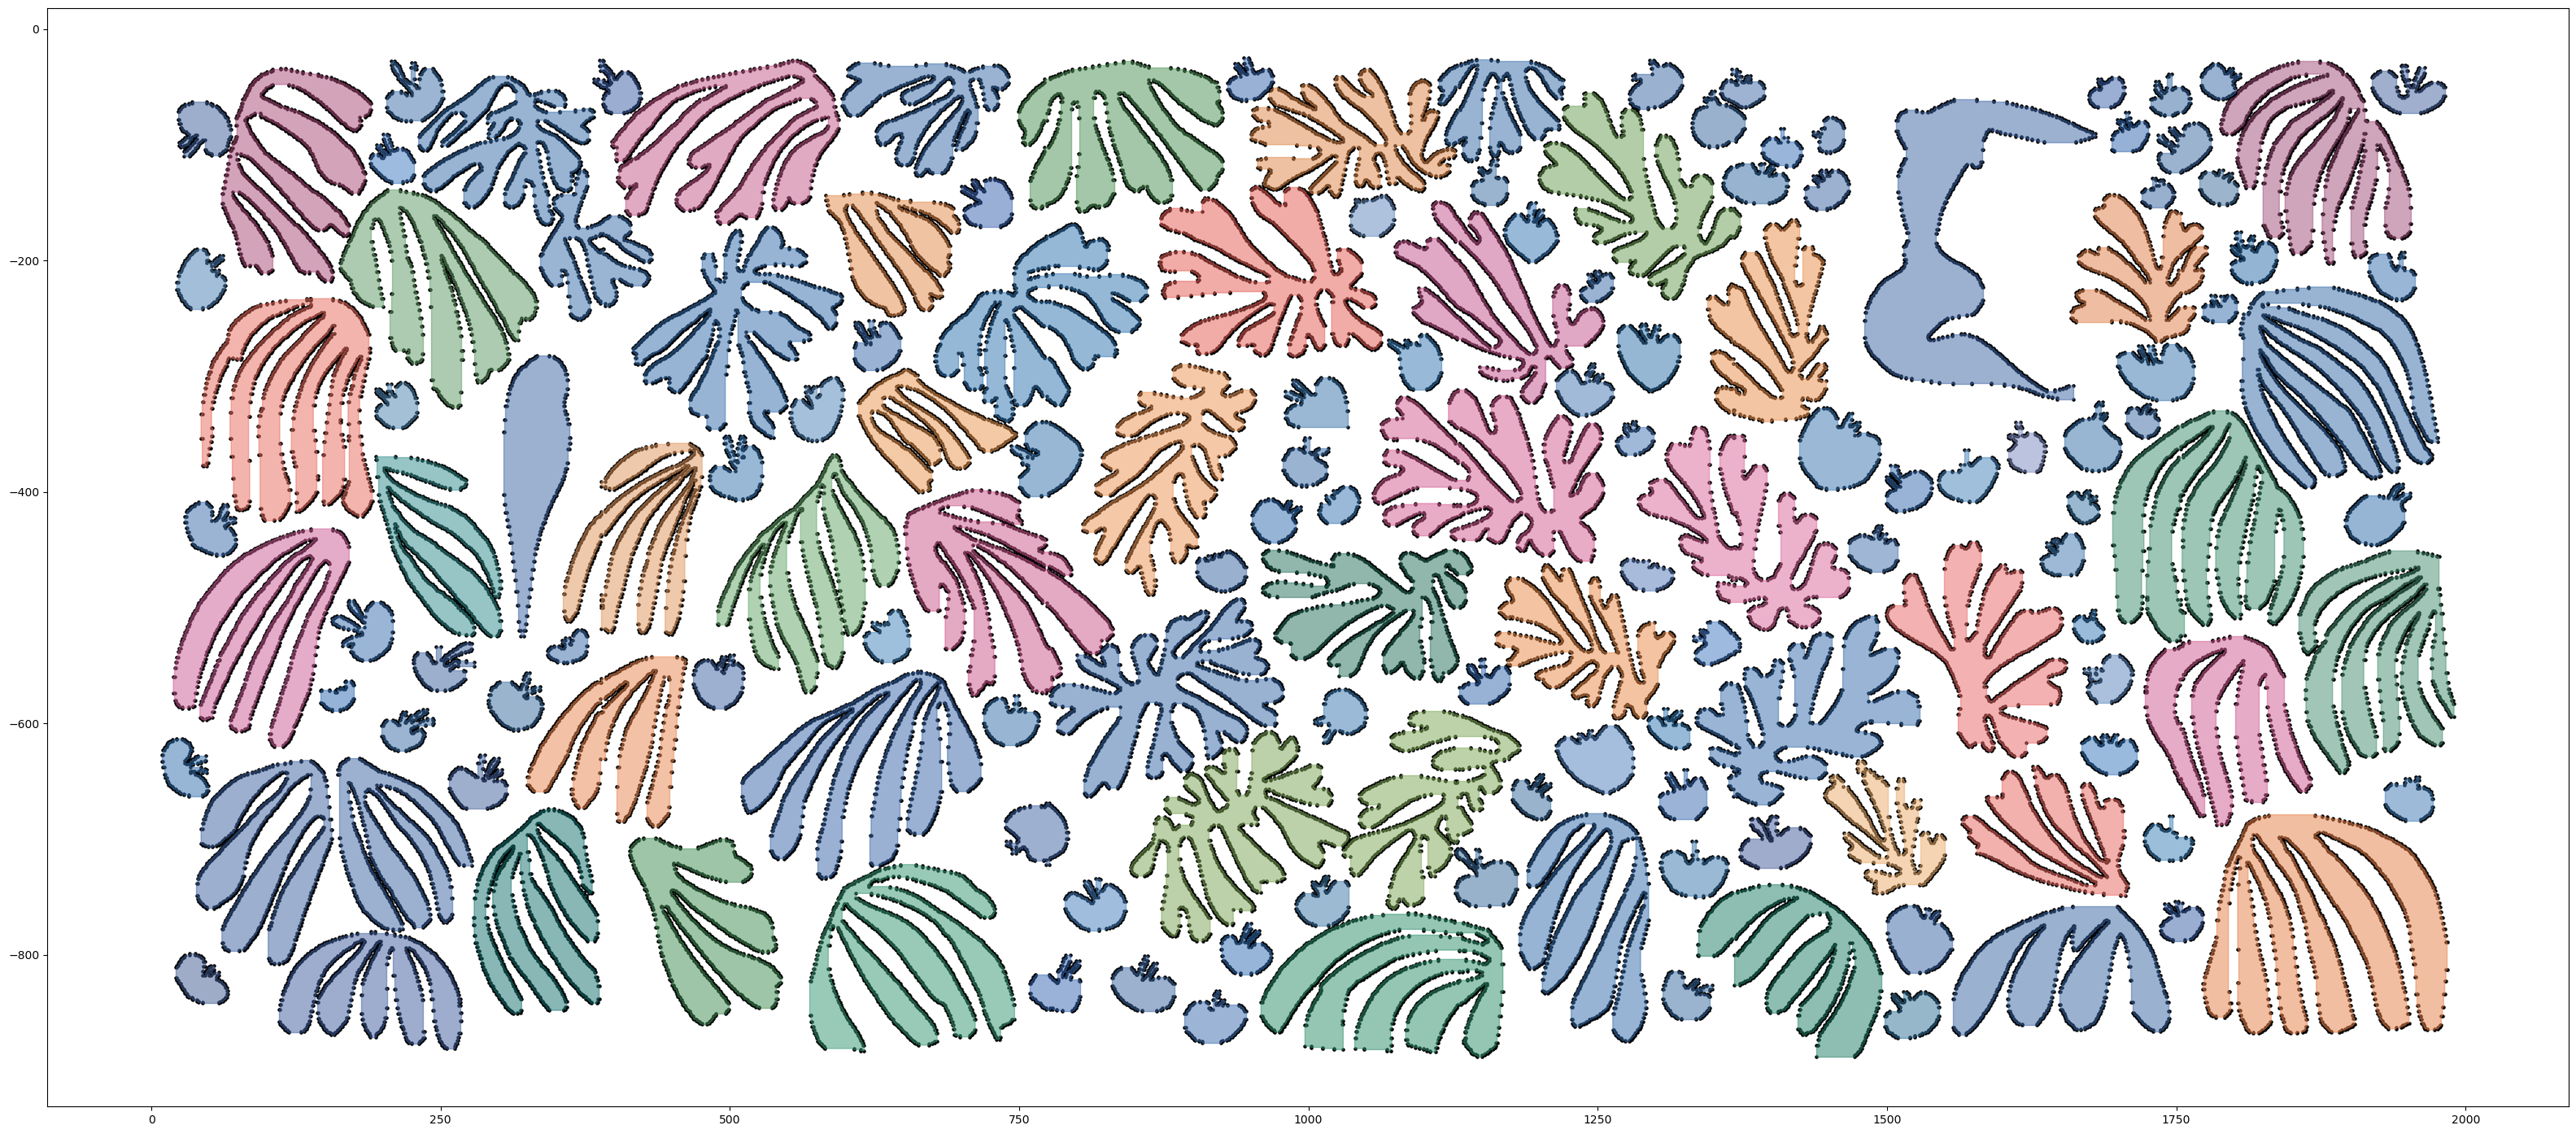

In [3]:
# read in color information
col_df = pd.read_csv("./colors.csv", header=None, names=["col"])

# read in outline files
data_dir = "outlines" # set directory 
files = [f for f in listdir(data_dir) if isfile(join(data_dir, f))] # create a list of file names
files.sort() # sort the list of file names
files.remove('.DS_Store') # remove .DS_Store file

# plot figure
plt.figure(figsize=(40,20)) # set figure size

for i in range(len(files)): # plot each shape
    curr_file = np.loadtxt(data_dir+"/"+files[i])
    plt.scatter(curr_file[:,0], -curr_file[:,1], s=5, c="k")
    plt.fill(curr_file[:,0], -curr_file[:,1], c=col_df.iloc[i][0], alpha=0.5)
    plt.gca().set_aspect("equal")
    plt.axis("on")


### Rotate shape

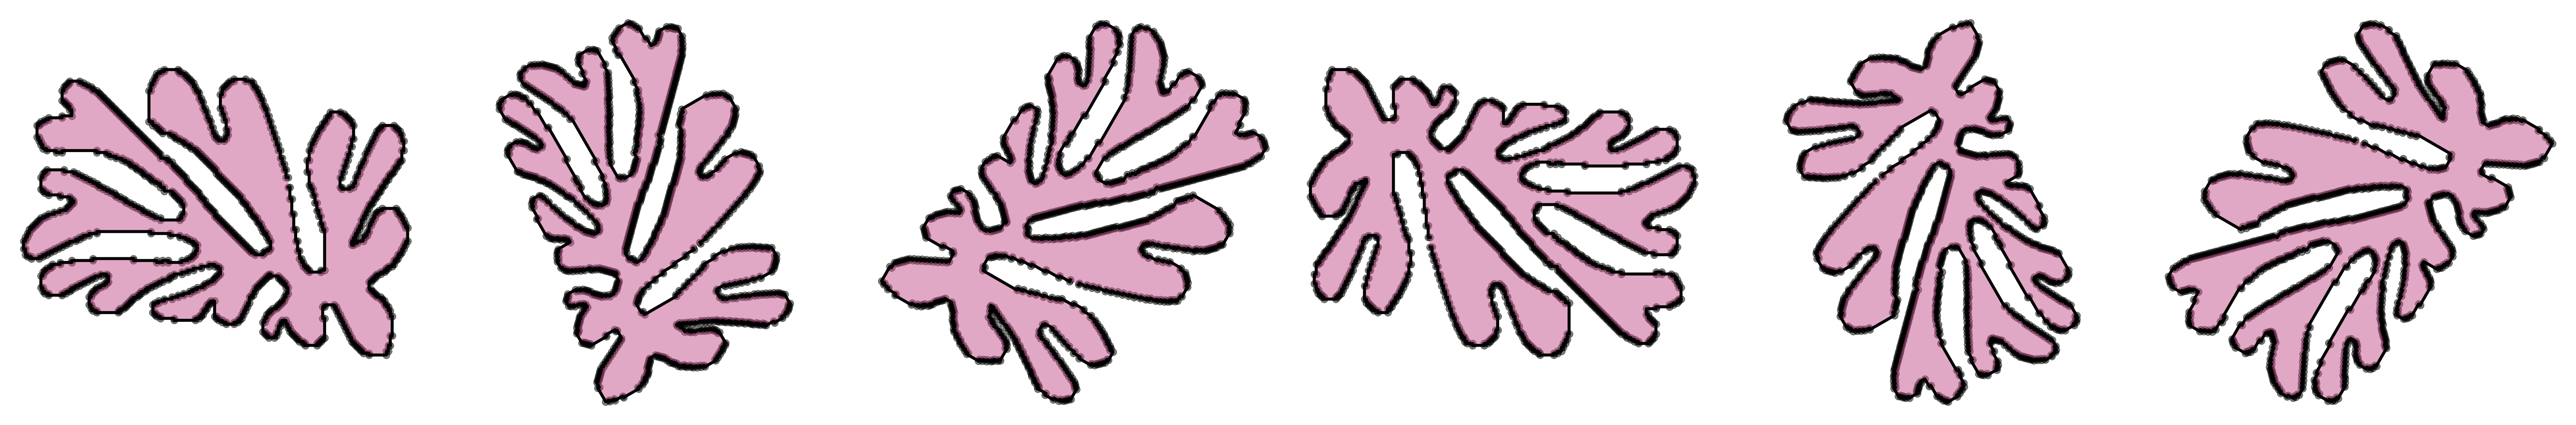

In [4]:
plt.figure(figsize=(60,10)) # set figure size

counter = 1 # subplot counter

for i in range(0,360,60): # for the desired angles

    degrees = i # set the degrees of rotation
    
    shape = np.loadtxt("./outlines/038_leaf.txt") # read in the shape
    
    xvals, yvals = rotate_points(shape[:,0],shape[:,1],degrees) # rotate the points
    
    shape = np.column_stack((xvals, -yvals)) # stack the x and y values

    plt.subplot(1,6,counter)
    plt.scatter(shape[:,0], shape[:,1], c="k", s=140, alpha=0.5) # plot
    plt.plot(shape[:,0], shape[:,1], c="k", lw=5)
    plt.fill(shape[:,0], shape[:,1], c=col_df.iloc[38][0], alpha=0.5)
    plt.gca().set_aspect("equal")
    plt.axis("off")

    counter+=1

plt.tight_layout()

### Translate ECT images

0
60
120
180
240
300


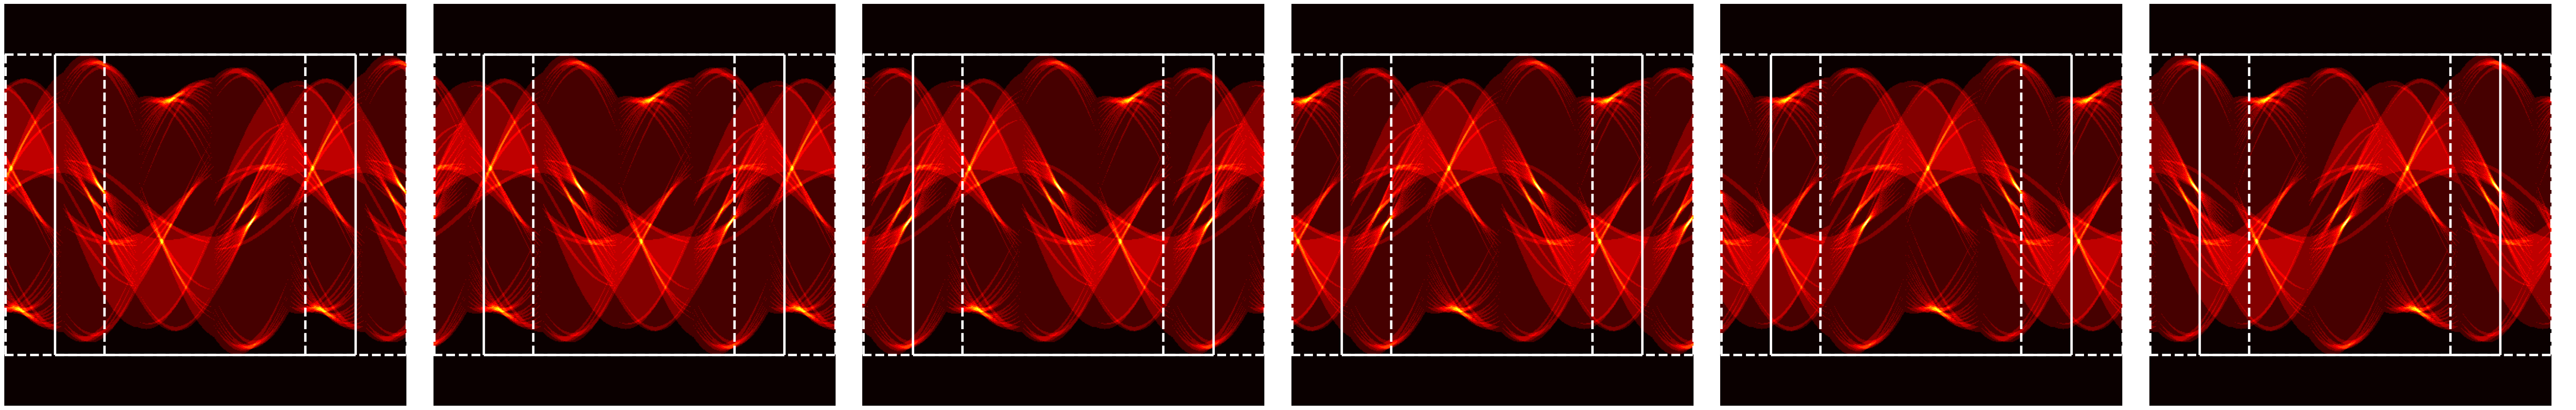

In [12]:
num_dirs = 360 # set the number of directions
num_thresh = 360 # set the number of thresholds

plt.figure(figsize=(60,10)) # set figure size
counter = 1 # subplot counter

for i in range(0,360,60): # for the desired angles

    print(i)

    G = EmbeddedGraph() # initiate a graph
    G.add_cycle(shape) # create graph from shape
    G.set_PCA_coordinates( center_type='min_max', scale_radius=1) # perform PCA and normalize
    myect = ECT(num_dirs = num_dirs, num_thresh=num_thresh) # calculate ECT
    myect.set_bounding_radius(1) # set bounding radius
    M = myect.calculateECT(G) # retrieve ECT
    M = np.roll(M,shift=i,axis=0) # translate the ECT the corresponding number of degrees
    
    last_60 = M[-60:,:] # get padding on right
    first_60 = M[0:60,:] # get padding on left
    zero_pad = np.zeros((480,60)) # create zero padding
    padded_M = np.row_stack((last_60, M, first_60)) # add circular padding
    zero_M = np.column_stack((zero_pad,padded_M,zero_pad)) # add zero padding

    plt.subplot(1,6,counter) # plot the ECT image
    plt.imshow(zero_M.T, cmap="hot")
    plt.vlines(x=[1+59,360+59], ymin=0+60, ymax=359+60,color="white", lw=4)
    plt.vlines(x=[1,60+59,300+59,480], ymin=0+60, ymax=359+60,color="white", linestyles="dashed", lw=4)
    plt.hlines(y=[0+60,359+60], xmin=0+60, xmax=359+60,color="white", lw=4)
    plt.hlines(y=[0+60,359+60], xmin=0, xmax=480,color="white", linestyles="dashed", lw=4)
    plt.axis("off")

    counter+=1

plt.tight_layout()

In [15]:
# print out the max Euler Characteristic value for legend
print(np.max(M))

11.0


### Rotate cylinder image

0
60
120
180
240
300


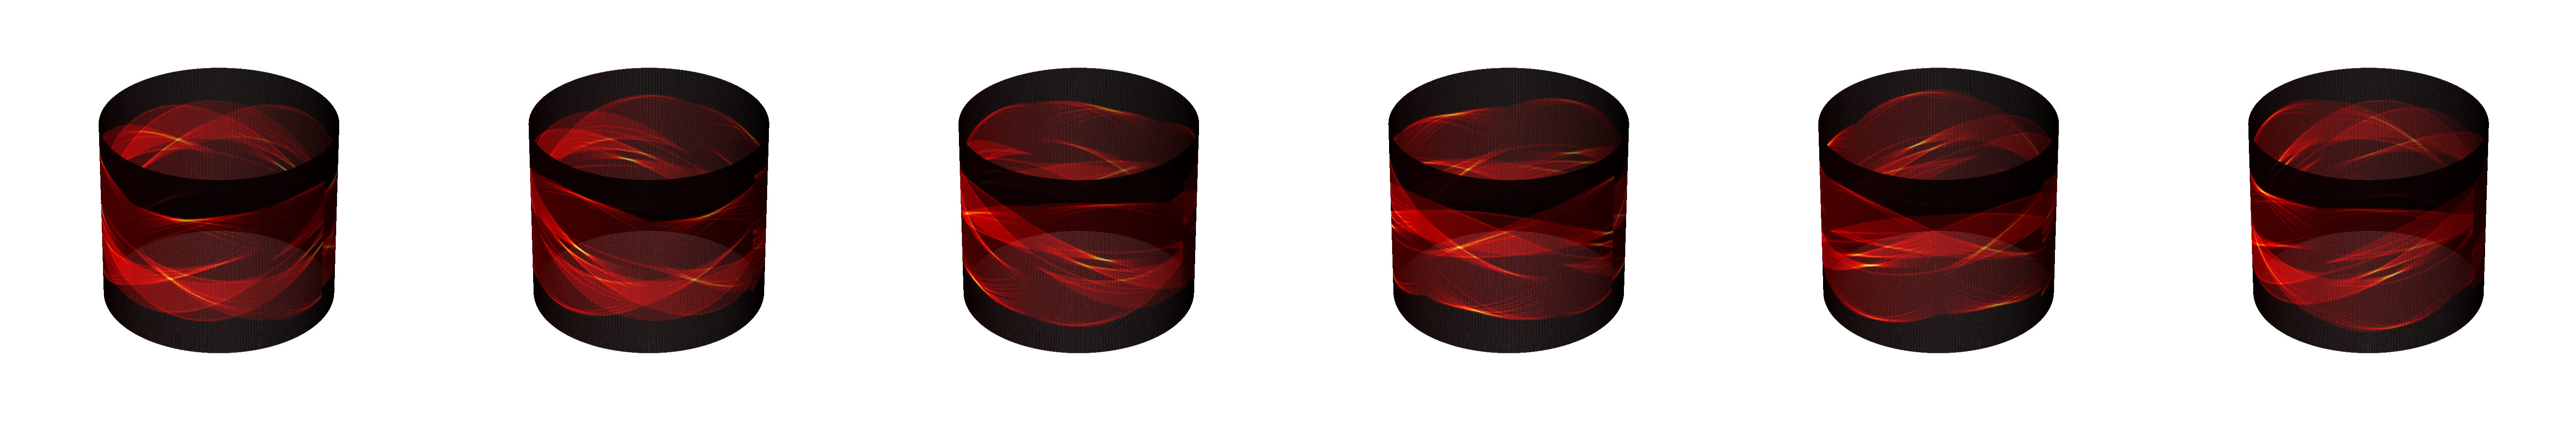

In [13]:
num_dirs = 360 # set the number of directions
num_thresh = 360 # set the number of thresholds

fig = plt.figure(figsize=(60,10)) # set figure size
counter = 1 # subplot counter

for i in range(0,360,60): # for the desired angles

    print(i)

    G = EmbeddedGraph() # initiate a graph
    G.add_cycle(shape) # create graph from shape
    G.set_PCA_coordinates( center_type='min_max', scale_radius=1) # perform PCA and normalize
    myect = ECT(num_dirs = num_dirs, num_thresh=num_thresh) # calculate ECT
    myect.set_bounding_radius(1) # set bounding radius
    M = myect.calculateECT(G) # retrieve ECT
    M = np.roll(M,shift=i,axis=0) # translate the ECT the corresponding number of degrees
    
    last_60 = M[-60:,:] # get padding on right
    first_60 = M[0:60,:] # get padding on left
    zero_pad = np.zeros((480,60)) # create zero padding
    padded_M = np.row_stack((last_60, M, first_60)) # add circular padding
    zero_M = np.column_stack((zero_pad,padded_M,zero_pad)) # add zero padding

    
    data = zero_M.T/np.max(zero_M) # normalize the ECT to 1
    h, w = data.shape # get dimensions
    theta, z = np.linspace(0, 2 * np.pi, w), np.linspace(0, 1, h) # calculate cylinder
    THETA, Z = np.meshgrid(theta, z)    
    X = np.cos(THETA)
    Y = np.sin(THETA)
    
    ax = fig.add_subplot(1,6,counter, projection='3d')
    cmap = plt.get_cmap('hot')
    plot = ax.plot_surface(
        X, Y, Z, rstride=1, cstride=1, facecolors=cmap(data),
        linewidth=0, antialiased=False, alpha=0.6)
    ax.axis('off')
    counter+=1

plt.tight_layout()

### PHATE (Potential of Heat-diffusion for Affinity-based Trajectory Embedding)

In [7]:
# Create ECTs of all shapes and store in array

num_dir=360 # set number of directional axes
num_thresh=360 # set number of thresholds each axis

# create array to store ECT outputs
# number of ECTs x num directional axes x number of thresholds
ect_arr = np.zeros((len(files),num_dir,num_thresh))

for i in range(len(files)): # for each shape

    if i%10==0:
        print(i)

    shape = np.loadtxt(data_dir+"/"+files[i]) # read in current shape
    G = EmbeddedGraph() # initiate a graph
    G.add_cycle(shape) # create graph from shape
    G.set_PCA_coordinates( center_type='min_max', scale_radius=1) # perform PCA and normalize
    myect = ECT(num_dirs = num_dir, num_thresh=num_thresh) # calculate ECT
    myect.set_bounding_radius(1) # set bounding radius
    ect_arr[i,:,:] = myect.calculateECT(G) # store ECT

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140


Calculating PHATE...
  Running PHATE on 150 observations and 129600 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 7.57 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.23 seconds.
  Calculated graph and diffusion operator in 7.82 seconds.
  Calculating optimal t...
    Automatically selected t = 33
  Calculated optimal t in 0.10 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.27 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.02 seconds.
Calculated PHATE in 8.23 seconds.


Text(0.5, 1.0, 'PHATE')

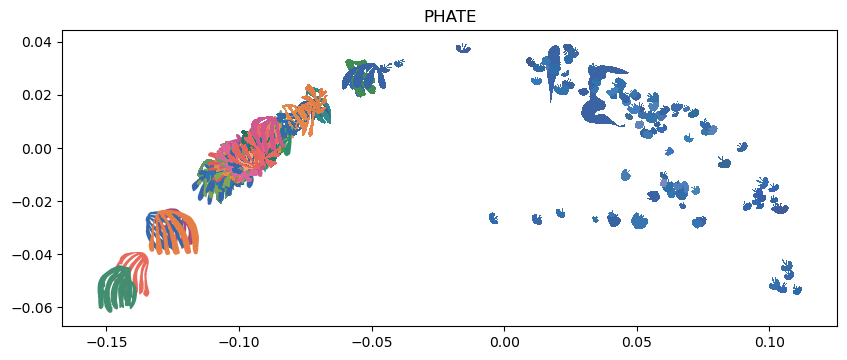

In [8]:
# flatten the ECT data to a 2D array 
flat_ect = np.reshape(ect_arr,
                             (np.shape(ect_arr)[0],
                              np.shape(ect_arr)[1]*np.shape(ect_arr)[2])
                            )

# create the PHATE embedding and transform
# we believe there are two groups, so set knn=2
phate_operator = phate.PHATE(n_components=2, random_state=42, knn=2)
phate_shapes = phate_operator.fit_transform(flat_ect)

scale_val = 0.00009 # set scale values
plt.figure(figsize=(10,10)) # set figure dimensions

for i in range(len(files)):
    shape = np.loadtxt(data_dir+"/"+files[i]) # read in current shape
    shape[:,1] = -shape[:,1] # invert shape
    zero_sh = scale_val*(shape - np.mean(shape, axis=0)) # zero center and scale shape
    trans_sh = (zero_sh + phate_shapes[i,[0,1]]) # translate shape to PHATE coordinate position

    plt.fill(trans_sh[:,0], trans_sh[:,1], c=col_df.iloc[i][0], lw=0, alpha=1) # plot shape
    plt.gca().set_aspect("equal")

plt.title("PHATE")

### tSNE (t-distributed Stochastic Neighbor Embedding)

In [9]:
tsne_shapes = TSNE(n_components=2, random_state=42).fit_transform(flat_ect) 

scale_val = 0.009 # set scale values
plt.figure(figsize=(10,10)) # set figure dimensions

for i in range(len(files)):
    shape = np.loadtxt(data_dir+"/"+files[i]) # read in current shape
    shape[:,1] = -shape[:,1] # invert shape
    zero_sh = scale_val*(shape - np.mean(shape, axis=0)) # zero center and scale shape
    trans_sh = (zero_sh + tsne_shapes[i,[0,1]]) # translate shape to tSNE coordinate position

    plt.fill(trans_sh[:,0], trans_sh[:,1], c=col_df.iloc[i][0], lw=0, alpha=1) # plot shape
    plt.gca().set_aspect("equal")

plt.title("tSNE")

Text(0.5, 1.0, 'tSNE')

### UMAP (Uniform Manifold Approximation and Projection for Dimension Reduction)

In [10]:
reducer = umap.UMAP(random_state=42)
reducer.fit(flat_ect)
umap_shapes = reducer.transform(flat_ect)

scale_val = 0.003 # set scale values
plt.figure(figsize=(10,10)) # set figure dimensions

for i in range(len(files)):
    shape = np.loadtxt(data_dir+"/"+files[i]) # read in current shape
    shape[:,1] = -shape[:,1] # invert shape
    zero_sh = scale_val*(shape - np.mean(shape, axis=0)) # zero center and scale shape
    trans_sh = (zero_sh + umap_shapes[i,[0,1]]) # translate shape to tSNE coordinate position

    plt.fill(trans_sh[:,0], trans_sh[:,1], c=col_df.iloc[i][0], lw=0, alpha=1) # plot shape
    plt.gca().set_aspect("equal")

plt.title("UMAP")

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Text(0.5, 1.0, 'UMAP')

__________________

### Code for making a GIF animation

In [ ]:
for i in range(0,360,10):

    degrees = i
    print(degrees)

    ########################
    # plot the rotated shape
    ########################
    # load in the shape
    shape = np.loadtxt("./outlines/038_leaf.txt")
    
    # rotate to desired degrees
    xvals, yvals = rotate_points(shape[:,0],shape[:,1],degrees)
    
    # stack the rotated x and y vals
    shape = np.column_stack((xvals, -yvals))
    
    # plot out the shape
    fig = plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(1,3,1)
    ax1.scatter(shape[:,0], shape[:,1], c="k", s=20, alpha=0.5)
    ax1.plot(shape[:,0], shape[:,1], c="k", lw=1)
    ax1.fill(shape[:,0], shape[:,1], c=col_df.iloc[38][0], alpha=0.5)
    ax1.set_aspect("equal")
    ax1.axis("off")
    
    #########################################
    # create a circular and zero padded image
    #########################################
    
    num_dirs = 360 # set number of directions
    num_thresh = 360 # set number of thresholds
    
    G = EmbeddedGraph() # initialize graph
    G.add_cycle(shape) # add the contour
    G.set_PCA_coordinates( center_type='min_max', scale_radius=1) # scale
    myect = ECT(num_dirs = num_dirs, num_thresh=num_thresh) # calculate the ECT
    myect.set_bounding_radius(1) # set bounding radius
    M = myect.calculateECT(G) # retrieve ECT as array

    M = np.roll(M,shift=i,axis=0) # translate the ECT the corresponding number of degrees
    
    last_60 = M[-60:,:] # calcualte the left circular pad
    first_60 = M[0:60,:] # calculate the right circular pad
    zero_pad = np.zeros((480,60)) # pad with zeros
    padded_M = np.row_stack((last_60, M, first_60)) # add circular pad
    zero_M = np.column_stack((zero_pad,padded_M,zero_pad)) # add zero pad
    
    ax2 = fig.add_subplot(1,3,2) # plot out the padded image
    ax2.imshow(zero_M.T, cmap="inferno_r")
    ax2.vlines(x=[1+59,360+59], ymin=0+60, ymax=359+60,color="k")
    ax2.vlines(x=[1,60+59,300+59,480], ymin=0+60, ymax=359+60,color="k", linestyles="dashed")
    ax2.hlines(y=[0+60,359+60], xmin=0+60, xmax=359+60,color="k")
    ax2.hlines(y=[0+60,359+60], xmin=0, xmax=480,color="k", linestyles="dashed")
    ax2.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax2.axis("off")
    
    #######################
    # create cylinder image
    #######################
    
    data = zero_M.T/np.max(zero_M) # transpose data and normalize to 1
    h, w = data.shape # get shape
    theta, z = np.linspace(0, 2 * np.pi, w), np.linspace(0, 1, h) # calculate cylinder
    THETA, Z = np.meshgrid(theta, z)    
    X = np.cos(THETA)
    Y = np.sin(THETA)
    
    ax3 = fig.add_subplot(1,3,3, projection='3d') # add subplot
    cmap = plt.get_cmap('inferno_r') # get color map
    plot = ax3.plot_surface( # plot cylinder
        X, Y, Z, rstride=1, cstride=1, facecolors=cmap(data),
        linewidth=0, antialiased=False, alpha=0.6)
    ###########
    
    plt.tight_layout()
    plt.savefig("./gif/" + "X_" + str(i) + "_" + "test.png")
    plt.close()